# Обучение без учителя


In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


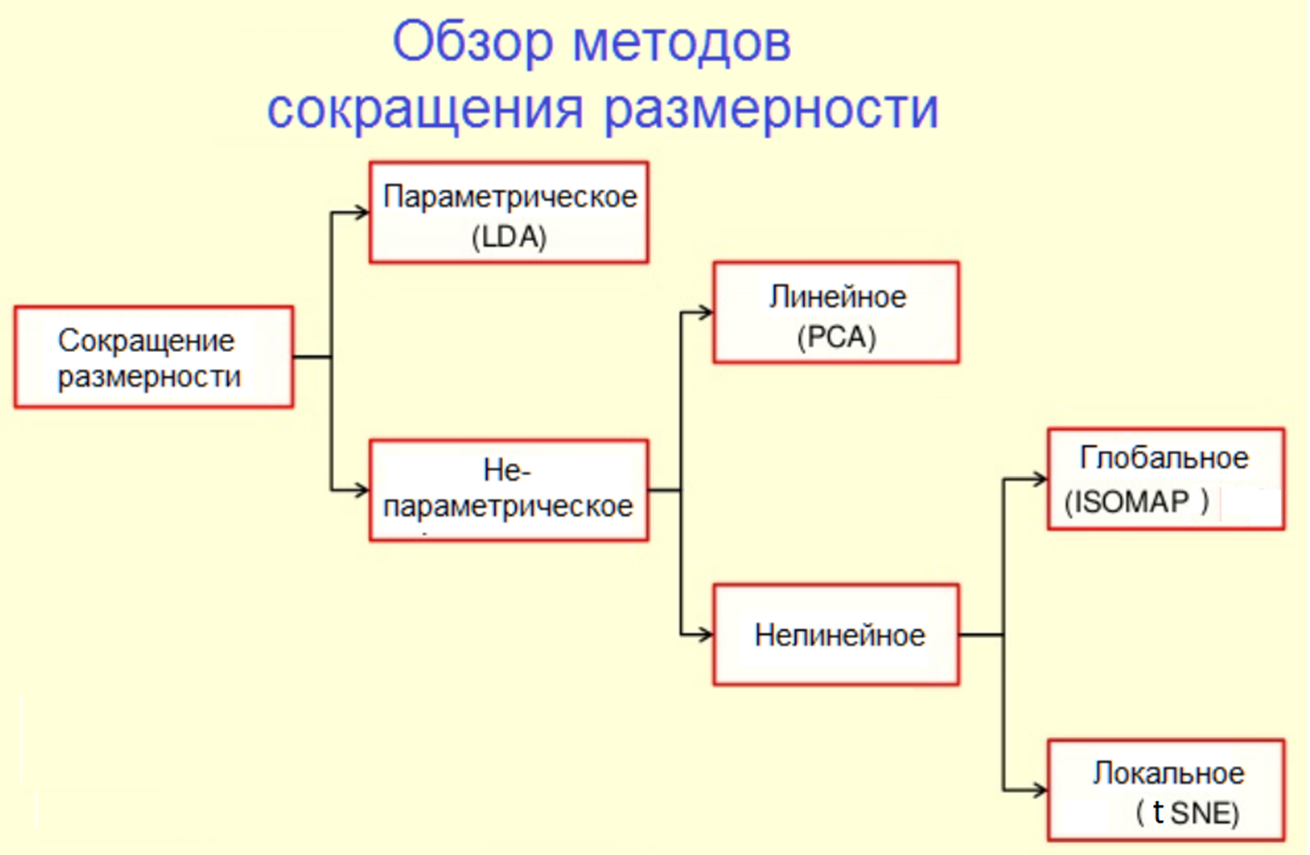

## Подготовка датасета

In [2]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

In [3]:
dataset = pd.read_csv("wine-clustering.csv")
with pd.option_context('display.max_columns',24): #Красивенько выводим
  display(dataset.head(10))

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
vals = (dataset["Alcohol"].unique() * 100).astype(int)
vals

array([1423, 1320, 1316, 1437, 1324, 1420, 1439, 1406, 1483, 1386, 1410,
       1412, 1375, 1475, 1438, 1363, 1430, 1383, 1419, 1364, 1293, 1371,
       1285, 1350, 1305, 1339, 1330, 1387, 1402, 1373, 1358, 1368, 1376,
       1351, 1348, 1328, 1307, 1422, 1356, 1341, 1388, 1421, 1390, 1394,
       1382, 1377, 1374, 1329, 1372, 1237, 1233, 1264, 1367, 1217, 1311,
       1334, 1221, 1229, 1349, 1299, 1196, 1166, 1303, 1184, 1270, 1200,
       1272, 1208, 1267, 1216, 1165, 1164, 1269, 1162, 1247, 1181, 1260,
       1234, 1182, 1251, 1242, 1225, 1222, 1161, 1146, 1252, 1176, 1141,
       1103, 1277, 1145, 1156, 1187, 1207, 1243, 1179, 1204, 1286, 1288,
       1281, 1253, 1284, 1336, 1352, 1362, 1287, 1332, 1308, 1279, 1323,
       1258, 1317, 1384, 1245, 1434, 1236, 1369, 1296, 1378, 1345, 1282,
       1340, 1220, 1416, 1327, 1413])

In [5]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = dataset.columns[dataset.columns != 'Alcohol']
print(cols_for_clusters)
df= dataset[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

Index(['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols',
       'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


In [6]:
X = df
y = (dataset["Alcohol"])

bins = [10.5, 11.5, 12.5, 13.5, 14.5, 15.5]
group_labels = [11, 12, 13, 14, 15]
# Используем pd.cut для группировки значений y
y = pd.cut(y, bins=bins, labels=group_labels, right=True)

yvals = dataset["Alcohol"]

In [7]:
y.head()

0    14
1    13
2    13
3    14
4    13
Name: Alcohol, dtype: category
Categories (5, int64): [11 < 12 < 13 < 14 < 15]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Malic_Acid            178 non-null    float64
 1   Ash                   178 non-null    float64
 2   Ash_Alcanity          178 non-null    float64
 3   Magnesium             178 non-null    int64  
 4   Total_Phenols         178 non-null    float64
 5   Flavanoids            178 non-null    float64
 6   Nonflavanoid_Phenols  178 non-null    float64
 7   Proanthocyanins       178 non-null    float64
 8   Color_Intensity       178 non-null    float64
 9   Hue                   178 non-null    float64
 10  OD280                 178 non-null    float64
 11  Proline               178 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 16.8 KB


In [9]:
df.describe()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


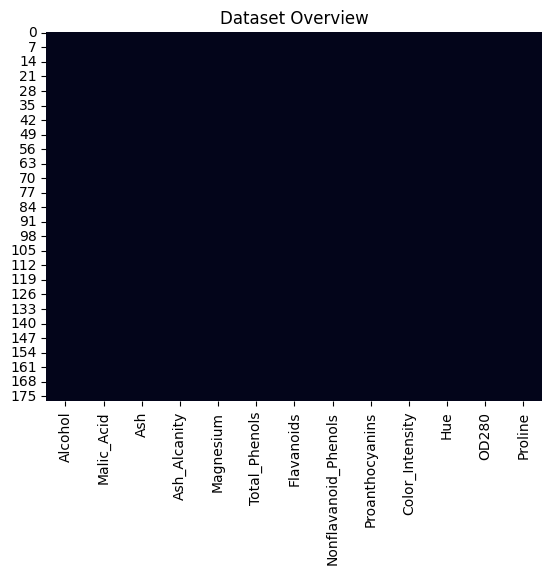

In [10]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

dic_cols = {col:utils_recognize_type(dataset, col, max_cat=20) for col in dataset.columns}
heatmap = dataset.isnull()
for k,v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()

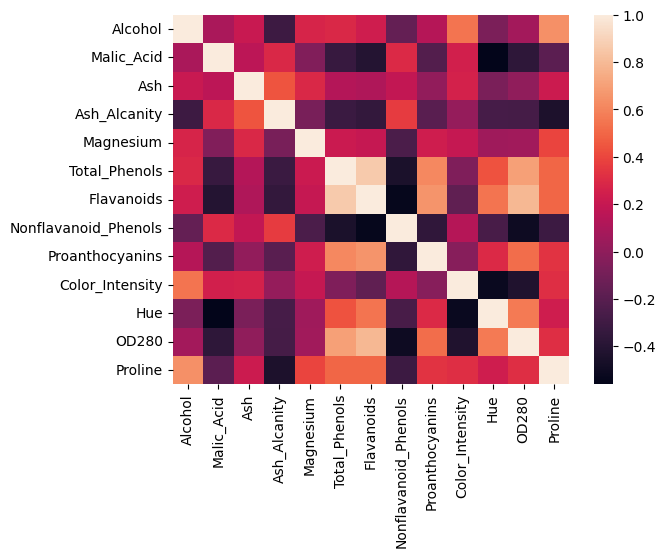

In [11]:
sns.heatmap(dataset.corr(numeric_only = True));

# Понижение размерности (Dimensionality Reduction)

## Вопросы для рассмотрения

* Важность признаков и выбор признаков
* Извлечение признаков
* Проклятие размерности
* Снижение размерности
* Преимущества снижения размерности
* Методы снижения размерности

## Проблема

Датасеты из 200 записей и 10 признаками (features) в практических задачах для МО встречаются не очень часто. Реальные датасеты собержат большое количество признаков и более 1 000 000 записей. Обучение на всех признаках может быть не эффективным - некоторые признаки не определяют или плохо определяют целевую переменную, часть признаков является линейнозависимыми.


### Важность признаков и выбор признаков

**Важность признаков (Feature Importance)** методы оценивания признаков на основе силы их влияния на целевую переменную.

**Выбор признаков (Feature Selection)** это процесс, в котором вы автоматически или вручную выбираете признаки, которые вносят наибольший вклад в целевую переменную..

Короче говоря, оценки важности признаков используются для выполнения выбора признаков.

Предположим, мы работаем над классификацией Iris. Сначала мы создадим базовую модель с использованием логистической регрессии. Теперь мы хотим опробовать выбор признаков и попытаться улучшить производительность нашей модели. При построении оценок важности признаков мы получаем следующий график:



![image.png](https://dphi-live.s3.amazonaws.com/media_uploads/image_c942a0f832534bc88e9399fea517ddef.png)



* Оценки важности признаков говорят нам, что ширина и длина лепестка являются двумя главными признаками. Остальные имеют гораздо более низкий показатель важности.
* Мы выберем эти 2 признака, преобразуя наш существующий набор данных так, чтобы он содержал только эти 2 признака.
* Мы обучим нашу модель на этом преобразованном наборе данных.
* Наконец, мы сравним метрики оценки нашей первоначальной модели логистической регрессии с этой новой моделью.

### Извлечение признаков

**Извлечение признаков (Feature Extraction)** это процесс сокращения признаков. В отличие от выбора признаков, который ранжирует существующие атрибуты в соответствии с их значимостью, извлечение признаков **фактически преобразует признаки**.

Основное различие между выбором признаков и извлечением заключается в том, что выбор признаков сохраняет подмножество исходных признаков, в то время как извлечение признаков создает совершенно новые.

Извлечение признаков — это название методов, которые **выбирают и/или объединяют переменные в признаки**, эффективно сокращая объем данных, которые необходимо обработать, при этом точно и полностью описывая исходный набор данных.

### Feature Extraction and Selection



![image.png](https://dphi-live.s3.amazonaws.com/media_uploads/image_40c45ead07c9428b9dba41f49aa14708.png)


**Выбор признаков** — Выбор наиболее релевантных признаков.

**Извлечение признаков** — Объединение признаков в новый, сокращенный набор признаков.

### Визуализация многомерного пространства

Поиграться можно сдесь:

https://projector.tensorflow.org/

Визуализация и проекции доступны для Iris dataset, Word2Vec, GNMT, MNIST


### Проклятие размерности

Вопрос. Зачем уменьшать объем данных путем выбора или извлечения признаков, если мы можем просто оптимизировать?

Существует нечто, известное как **Проклятие размерности**. В машинном обучении «размерность» = количество признаков (т. е. входных переменных) в вашем наборе данных.


![image.png](https://dphi-live.s3.amazonaws.com/media_uploads/image_9a9cb3ade0a943a2a7f82019949afa96.png)


Когда количество признаков очень велико по сравнению с количеством наблюдений (строк) в вашем наборе данных, некоторые алгоритмы испытывают трудности с обучением эффективных моделей. Это называется **Проклятием размерности**.


### Что такое проклятие размерности

Предположим, у вас есть прямая линия длиной 50 метров, и вы где-то на ней уронили монету. Найти ее будет несложно. Вы идете по линии, и это занимает две минуты.

Теперь предположим, что у вас есть квадрат со стороной 50 метров, и вы где-то на нем уронили монету. Это будет довольно сложно, как искать на двух футбольных полях, соединенных вместе. Это может занять несколько дней.

Теперь куб со сторонами 50 метров. Это как искать в многоподъездном 20-этажном здании.

**Сложность поиска в пространстве становится намного сложнее, чем больше измерений.**


Проклятие размерности возникает во всех задачах, которые возникают при работе с данными в более высоких измерениях.


![image.png](https://dphi-live.s3.amazonaws.com/media_uploads/image_2f70eb33799c477a9b363fd2cb3be348.png)


**Проклятие размерности** По мере увеличения количества признаков модель становится сложнее. Чем больше признаков, тем больше вероятность переобучения. Модель машинного обучения, обученная на большом количестве признаков, становится все более зависимой от данных, на которых она была обучена, и в свою очередь переобученна, что приводит к плохой производительности на реальных данных, сводя на нет цель модели.

### Уменьшение размерности (Dimensionality Reduction)

В машинном обучении может быть слишком много признаков, по которым выполняется окончательная классификация. Эти факторы известны как переменные.

Чем больше число признаков, тем сложнее визуализировать обучающий набор и затем работать с ним. Иногда большинство этих признаков коррелируют и, следовательно, избыточны.

Здесь в игру вступают алгоритмы снижения размерности.

### Преимущества выполнения снижения размерности

* **Уменьшает переобучение:** Меньше избыточных данных означает меньше возможностей для принятия решений на основе шума (нерелевантных данных).
* **Улучшает производительность модели:** Меньше вводящих в заблуждение данных означает улучшение производительности нашей модели.
* **Сокращает время обучения:** Меньше данных означает, что алгоритмы обучаются быстрее.
* **Использует немаркированные данные:** Большинство методов извлечения признаков не требуют обучения. Вы можете обучить свой автоэнкодер или подогнать свой PCA на немаркированных данных. Это может быть полезно, если у вас много немаркированных данных, а маркировка занимает много времени и стоит дорого.
* **Лучшая визуализация:** Уменьшение размерности данных до 2D или 3D может позволить нам точно построить и визуализировать их.

### Методы уменьшения размерности

![image.png](https://dphi-live.s3.amazonaws.com/media_uploads/image_ed8c08cc062f453d9e9556f97ae4c5b0.png)

Различные методы, используемые для снижения размерности, включают, но не ограничиваются::

1. Principal Component Analysis (PCA)
2. Independent Component Analysis (ICA)
3. Factor Analysis
4. Linear Discriminant Analysis (LDA)
5. Generalized Discriminant Analysis (GDA)

Снижение размерности может быть как линейным, так и нелинейным, в зависимости от используемого метода. Далее мы подробно рассмотрим некоторые методы снижения размерности.

# Линейные методы уменьшения размерности (Linear Dimensionality Reduction Methods)

* Principal Component Analysis (PCA)
* Independent Component Analysis (ICA)

### Linear Dimensionality Reduction Methods

Наиболее распространенными и известными методами снижения размерности являются те, которые применяют линейные преобразования, например:

1. **PCA (Анализ главных компонент):** Широко используемый для снижения размерности в непрерывных данных, PCA вращает и проецирует данные в направлении увеличения дисперсии. Признаки с максимальной дисперсией являются главными компонентами.
2. **Факторный анализ:** метод, который используется для сокращения большого количества переменных до меньшего количества признаков. Значения наблюдаемых данных выражаются как функции ряда возможных признаков, чтобы найти наиболее важные. Предполагается, что наблюдения вызваны линейным преобразованием скрытых признаков меньшей размерности и добавленным гауссовым шумом.
3. **LDA (Линейный дискриминантный анализ):** проецирует данные таким образом, что разделимость классов максимизируется. Примеры из одного класса располагаются близко друг к другу проекцией. Примеры из разных классов располагаются далеко друг от друга проекцией.
4. **ICA (Independent Component Analysis):** преобразует набор данных в столбцы независимых компонентов. Слепое разделение источников (Blind Source Separation) и «проблема коктейльной вечеринки» ("cocktail party problem") — это другие названия для него.


Некоторые другие методы линейного снижения размерности включают в себя анализ канонических корреляций, максимальные факторы автокорреляции, анализ неполной независимой компоненты, обучение с использованием метрики расстояния и многое другое. Другими словами - есть еще что поизучать, помимо этого блокнота




### Метод главных компонентов (Principal Component Analysis, PCA)

Principal Component Analysis(PCA) один из самых популярных методов линейного уменьшения размерности. Иногда он используется отдельно, а иногда как начальное решение для других методов уменьшения размерности.

PCA — это метод на основе проекций, который часто используется для уменьшения размерности больших наборов данных путем преобразования большого набора переменных в меньший, который по-прежнему содержит большую часть информации о большом наборе.

Уменьшение количества переменных в наборе данных, естественно, происходит за счет точности, но трюк в уменьшении размерности заключается в том, чтобы пожертвовать небольшой точностью ради простоты. Потому что меньшие наборы данных легче исследовать и визуализировать, и они делают анализ данных намного проще и быстрее для алгоритмов машинного обучения без обработки посторонних переменных.

Итак, подведем итог, идея PCA проста — уменьшить количество переменных в наборе данных, сохраняя при этом как можно больше информации.

Некоторые реальные приложения PCA — это обработка изображений, система рекомендаций фильмов, оптимизация распределения мощности в различных каналах связи.

### PCA кратко

Предположим, вы хотите дифференцировать различные продукты питания на основе их питательной ценности. Какая переменная будет хорошим выбором для дифференциации продуктов питания?

Если вы выберете переменную, которая сильно варьируется от одного продукта к другому, скажем, уровень натрия, вы сможете правильно их изолировать. Ваша работа будет намного сложнее, если выбранная переменная почти одинакова в большинстве продуктов питания, скажем, витамин E.

Что делать, если в данных нет переменной, которая правильно разделяет продукты питания? Мы можем создать искусственную переменную с помощью линейной комбинации исходных переменных, таких как:

$art_{var1} = 2\times org_{var1} - 3\times org_{var2} + 5\times org_{var3}$

**По сути, именно это и делает PCA: он находит наилучшие линейные комбинации исходных переменных, так что дисперсия или разброс по новой переменной максимальны.**

### Когда использовать PCA?

1. Хотите ли вы сократить количество переменных, но не можете определить переменные, которые нужно полностью исключить из рассмотрения?
2. Хотите ли вы убедиться, что ваши переменные независимы друг от друга?
3. Удобно ли вам сделать ваши независимые переменные менее интерпретируемыми?

Если вы ответили «да» на все три вопроса, то PCA — хороший метод для использования. Если вы ответили «нет» на вопрос 3, вам **не следует** использовать PCA.


Когда используются PCA:

* Когда скрытые признаки управляют закономерностями в данных.
* Для снижения размерности.
* Для визуализации многомерных данных.
* Для снижения шума.
* В качестве этапа предварительной обработки для повышения производительности других алгоритмов.


In [12]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [14]:
unique_labels

NameError: name 'unique_labels' is not defined

Кластер 14 содержит 53 точек
Кластер 13 содержит 66 точек
Кластер 15 содержит 2 точек
Кластер 12 содержит 53 точек
Кластер 11 содержит 4 точек


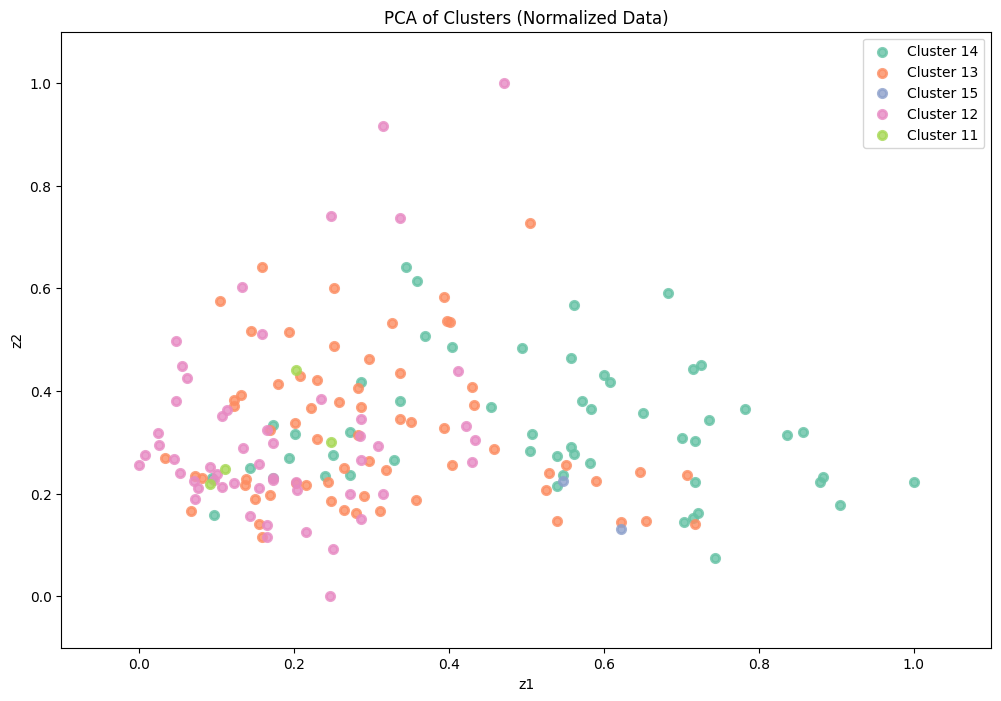

In [15]:
# Применение PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
y_unique = y.unique()

# Нормализация данных
scaler = MinMaxScaler()
X_new_normalized = scaler.fit_transform(X_new)

# Генерация цветов для кластеров с использованием Seaborn
colors = sns.color_palette("Set2", n_colors=len(y_unique))

# Если кластеров больше, чем в палитре, циклично повторяем цвета
if len(y_unique) > len(colors):
    colors = [colors[i % len(colors)] for i in range(len(y_unique))]

# Создаем график
plt.figure(figsize=(12, 8))

for color, i in zip(colors, y_unique):
    cluster_points = X_new_normalized[y == i]
    print(f"Кластер {i} содержит {len(cluster_points)} точек")
    if len(cluster_points) > 0:
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1], color=color, alpha=0.8, lw=2, label=f'Cluster {i}'
        )
    else:
        print(f"Предупреждение: кластер {i} пуст!")

# Установим ограничения на оси
plt.xlim(X_new_normalized[:, 0].min() - 0.1, X_new_normalized[:, 0].max() + 0.1)
plt.ylim(X_new_normalized[:, 1].min() - 0.1, X_new_normalized[:, 1].max() + 0.1)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("PCA of Clusters (Normalized Data)")
plt.show()

Очень полезной функцией для оценки того, насколько каждый главный компонент сохраняет информацию о дисперсии наших данных, является функция explained_variance_ratio. Используя наш набор данных iris, мы можем вызвать explained_variance_ratio следующим образом:



In [16]:
pca.explained_variance_ratio_

array([0.9980951 , 0.00173592])

Как вы можете видеть выше, первые главные компоненты сохраняют 92% дисперсии набора данных iris, тогда как вторые главные компоненты сохраняют только 5% дисперсии. Это указывает на то, что мы, скорее всего, получим хороший результат, если еще больше уменьшим размерность до 1D.



### Независисый анализ компонентов (Independent Component Analysis, ICA)

ICA — это метод снижения размерности, аналогичный PCA в том смысле, что он берет набор признаков и создает другой набор, который полезен в некотором роде.

Но в то время как PCA пытается максимизировать дисперсию, ICA предполагает, что признаки представляют собой смеси независимых источников, и он пытается изолировать эти независимые источники, которые смешаны в наборе данных.

Мотивация ICA заключается в том, чтобы **взять исходный набор признаков и попытаться определить те из них, которые вносят независимый вклад в набор данных**, другими словами, те, которые имеют наименьшую корреляцию с другими признаками. Поэтому **он изолирует эти наиболее важные компоненты**. Эта проблема называется **слепой изоляцией источника**.**

### Применение ICA

Одним из интересных применений ICA является анализ электроэнцефалографических данных (данных из мозга). ICA является важным инструментом в нейровизуализации, фМРТ и анализе ЭЭГ, который помогает отделить нормальные сигналы от аномальных.

Ниже приведен пример показаний 14 каналов из сканирования ЭЭГ, которое длилось 4,5 секунды, и независимых компонентов, извлеченных из набора данных.


![image.png](https://dphi-live.s3.amazonaws.com/media_uploads/image_79b4f20815fc46fa88473fb2ea6f0d89.png)


### Недостатки ICA

ICA не может раскрыть нелинейные связи набора данных. ICA ничего не говорит нам о порядке независимых компонентов или о том, сколько из них релевантны.

### Сравнение PCA и ICA

* PCA удаляет корреляции, но не зависимость более высокого порядка.
* ICA удаляет корреляции и зависимость более высокого порядка.
* PCA: некоторые компоненты важнее других (собственные значения).
* ICA: все компоненты **одинаково важны**.
* PCA: векторы ортогональны.
* Векторы ICA **не ортогональны**.


![image.png](https://dphi-live.s3.amazonaws.com/media_uploads/image_134f377882234a4384aacc8b7eec097a.png)

In [17]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

Кластер 14 содержит 53 точек
Кластер 13 содержит 66 точек
Кластер 15 содержит 2 точек
Кластер 12 содержит 53 точек
Кластер 11 содержит 4 точек


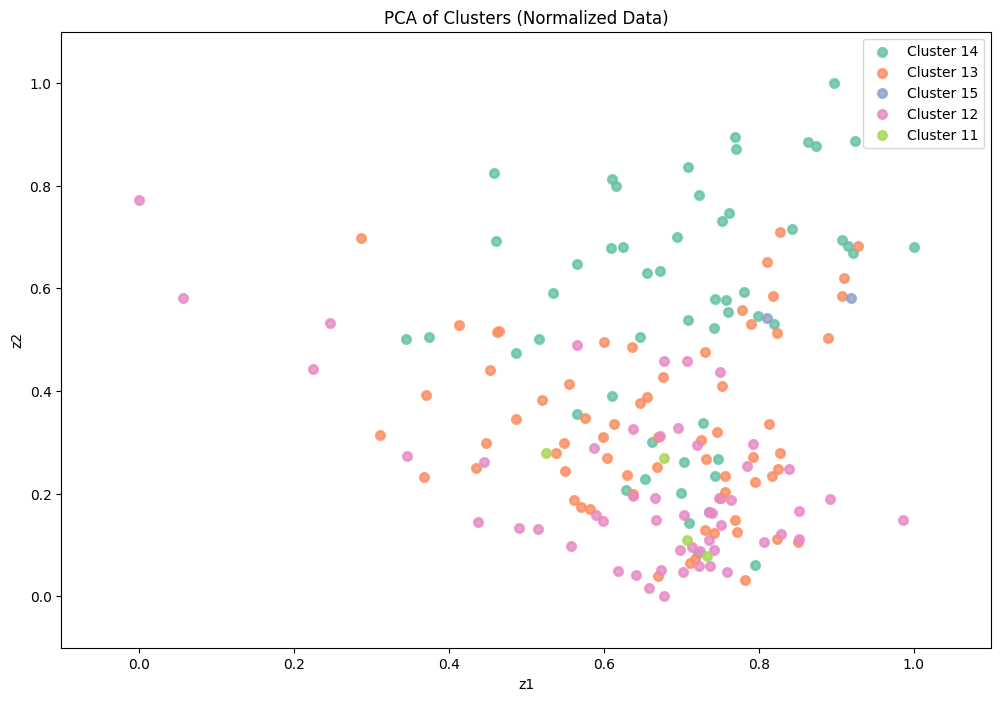

In [18]:
plt.figure(figsize=(12,8))
lw = 2

# Нормализация данных
scaler = MinMaxScaler()
X_new_normalized = scaler.fit_transform(X_new)

for color, i in zip(colors, y_unique):
    cluster_points = X_new_normalized[y == i]
    print(f"Кластер {i} содержит {len(cluster_points)} точек")
    if len(cluster_points) > 0:
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1], color=color, alpha=0.8, lw=2, label=f'Cluster {i}'
        )
    else:
        print(f"Предупреждение: кластер {i} пуст!")

# Установим ограничения на оси
plt.xlim(X_new_normalized[:, 0].min() - 0.1, X_new_normalized[:, 0].max() + 0.1)
plt.ylim(X_new_normalized[:, 1].min() - 0.1, X_new_normalized[:, 1].max() + 0.1)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("PCA of Clusters (Normalized Data)")
plt.show()

#Нелинейные методы уменьшения размерности

Методы нелинейного преобразования, также известные как методы многообразного обучения, используются, когда данные не лежат в линейном подпространстве. Она основана на гипотезе многообразия, которая гласит, что в многомерной структуре большая часть релевантной информации концентрируется в небольшом числе многообразий низкой размерности.


Если линейное подпространство представляет собой плоский лист бумаги, то свернутый лист бумаги является простым примером нелинейного многообразия. Неформально это называется швейцарским валом, канонической проблемой в области нелинейного уменьшения размерности.


Некоторые популярные методы многообразного обучения:


1. Многомерное масштабирование (MDS): Метод, используемый для анализа сходства или несходства данных в виде расстояний в геометрических пространствах. Проецирует данные в более низкую размерность таким образом, что точки данных, которые находятся близко друг к другу (в терминах евклидова расстояния) в более высокой размерности, также близки в более низкой размерности.
1. Изометрическое отображение признаков (Isomap) : Проецирует данные в более низкую размерность, сохраняя геодезическое расстояние (а не евклидово расстояние, как в MDS). Геодезическое расстояние — это кратчайшее расстояние между двумя точками на кривой.
1. Локально линейное встраивание (LLE) : Восстановление глобальной нелинейной структуры из линейных аппроксимации. Каждый локальный участок многообразия может быть записан как линейная, взвешенная сумма его соседей при наличии достаточного количества данных.
1. Hessian Eigenmapping (HLLE) : Проецирует данные в более низкую размерность, сохраняя при этом локальное окружение, как LLE, но использует оператор Гессена для лучшего достижения этого результата, отсюда и название.
1. Спектральное вложение (собственные карты Лапласа) : Использование спектральных методов для уменьшения размерности путем сопоставления близлежащих входов с ближайшими выходами. Он сохраняет локальность, а не локальную линейность.
1. t-распределенное стохастическое вложение соседей (t-distributed Stochastic Neighbor Embedding, tSNE) : Вычисляет вероятность того, что пары точек данных в пространстве высокой размерности связаны, а затем выбирает вложение низкой размерности, которое дает аналогичное распределение.

### Kernel PCA

Набор данных iris, который мы использовали выше, является примером линейно разделимого набора данных. Это упрощает алгоритму снижения размерности уменьшение его размерности, сохраняя при этом большое количество дисперсии данных, как вы можете видеть в результате функции explained_variance_ratio выше.

Дело в том, что PCA по своей природе является подходом линейного снижения размерности. Если у нас есть нелинейный набор данных, то PCA может не справиться с уменьшением его размерности.

К счастью, есть так называемый трюк ядра, который мы можем применить к алгоритму PCA, как вы видели в алгоритмах машины опорных векторов.

Этот трюк ядра позволяет нам использовать PCA для выполнения нелинейных проекций для снижения размерности, и этот метод называется ядерным PCA. Существует несколько ядер, которые мы можем реализовать с помощью PCA, например, линейное ядро, ядро ​​RBF и сигмоидальное ядро.

Ниже приведен пример того, как мы можем реализовать ядро ​​PCA с помощью библиотеки scikit-learn.

In [19]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

Кластер 14 содержит 53 точек
Кластер 13 содержит 66 точек
Кластер 15 содержит 2 точек
Кластер 12 содержит 53 точек
Кластер 11 содержит 4 точек


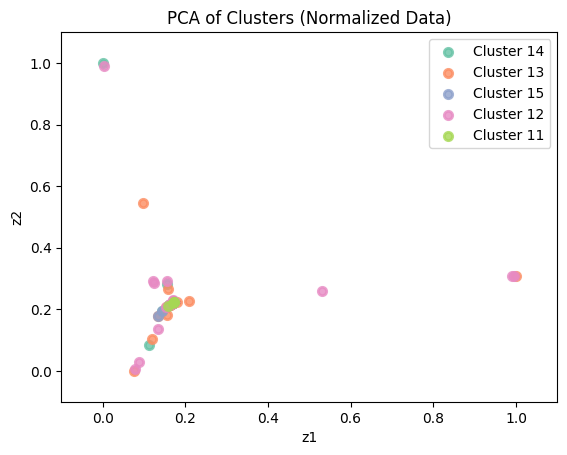

In [20]:
# Нормализация данных
scaler = MinMaxScaler()
X_new_normalized = scaler.fit_transform(X_new)

for color, i in zip(colors, y_unique):
    cluster_points = X_new_normalized[y == i]
    print(f"Кластер {i} содержит {len(cluster_points)} точек")
    if len(cluster_points) > 0:
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1], color=color, alpha=0.8, lw=2, label=f'Cluster {i}'
        )
    else:
        print(f"Предупреждение: кластер {i} пуст!")

# Установим ограничения на оси
plt.xlim(X_new_normalized[:, 0].min() - 0.1, X_new_normalized[:, 0].max() + 0.1)
plt.ylim(X_new_normalized[:, 1].min() - 0.1, X_new_normalized[:, 1].max() + 0.1)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("PCA of Clusters (Normalized Data)")
plt.show()

### tSNE

t-SNE - метод, который использует поэтапный итерационный подход для низкоразмерного представления исходных данных с сохранением информации об их локальном соседстве.

**вложение** — многомерные данные, представленные в пространстве меньшей размерности;
**сосед** — точка данных, расположенная близко к интересующей нас точке данных;
**стохастический** — случайно используемый в итерационном процессе при поиске репрезентативного вложения;
**t-распределение** — распределение вероятности, используемое алгоритмом для вычисления оценок сходства в низкоразмерном вложении.



####Этапы работы tSNE

##### Этап 1
t-SNE начинается с определения сходства точек на основе расстояний между ними. Близлежащие точки считаются похожими, в то время как удаленные считаются непохожими.

Для этого измеряются расстояния между интересующей точкой и другими точками, после чего они помещаются на нормальную кривую. Такие измерения проделываются для каждой точки с применением некоторого масштабирования для учета различий в плотности различных секций.

Например, на приведенной ниже иллюстрации мы наблюдаем более высокую плотность в секции, занятой синими точками, и более низкую плотность в секции, занятой желтыми точками.

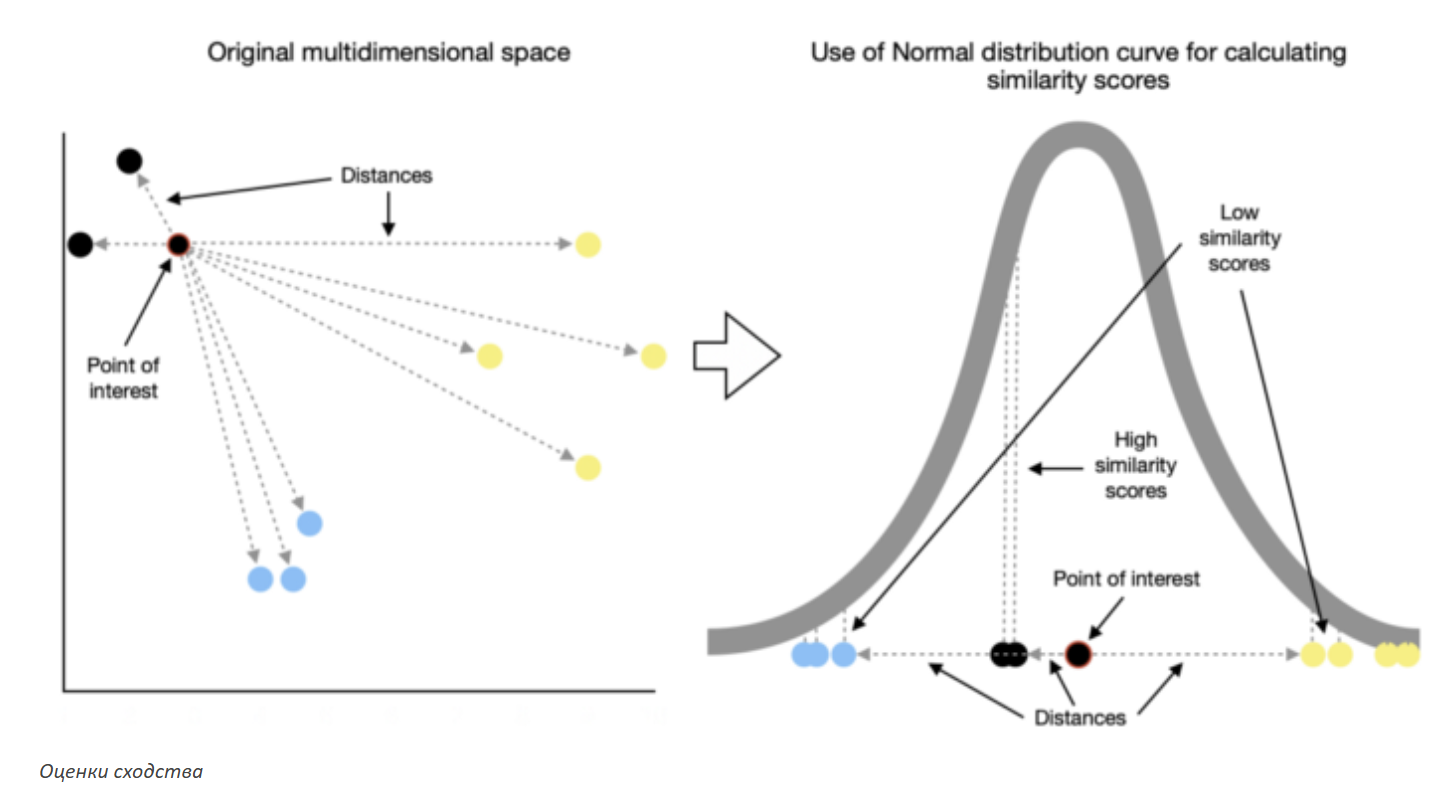

Результатом этих вычислений является матрица, содержащая оценки сходства между каждой парой точек из исходного многомерного пространства.

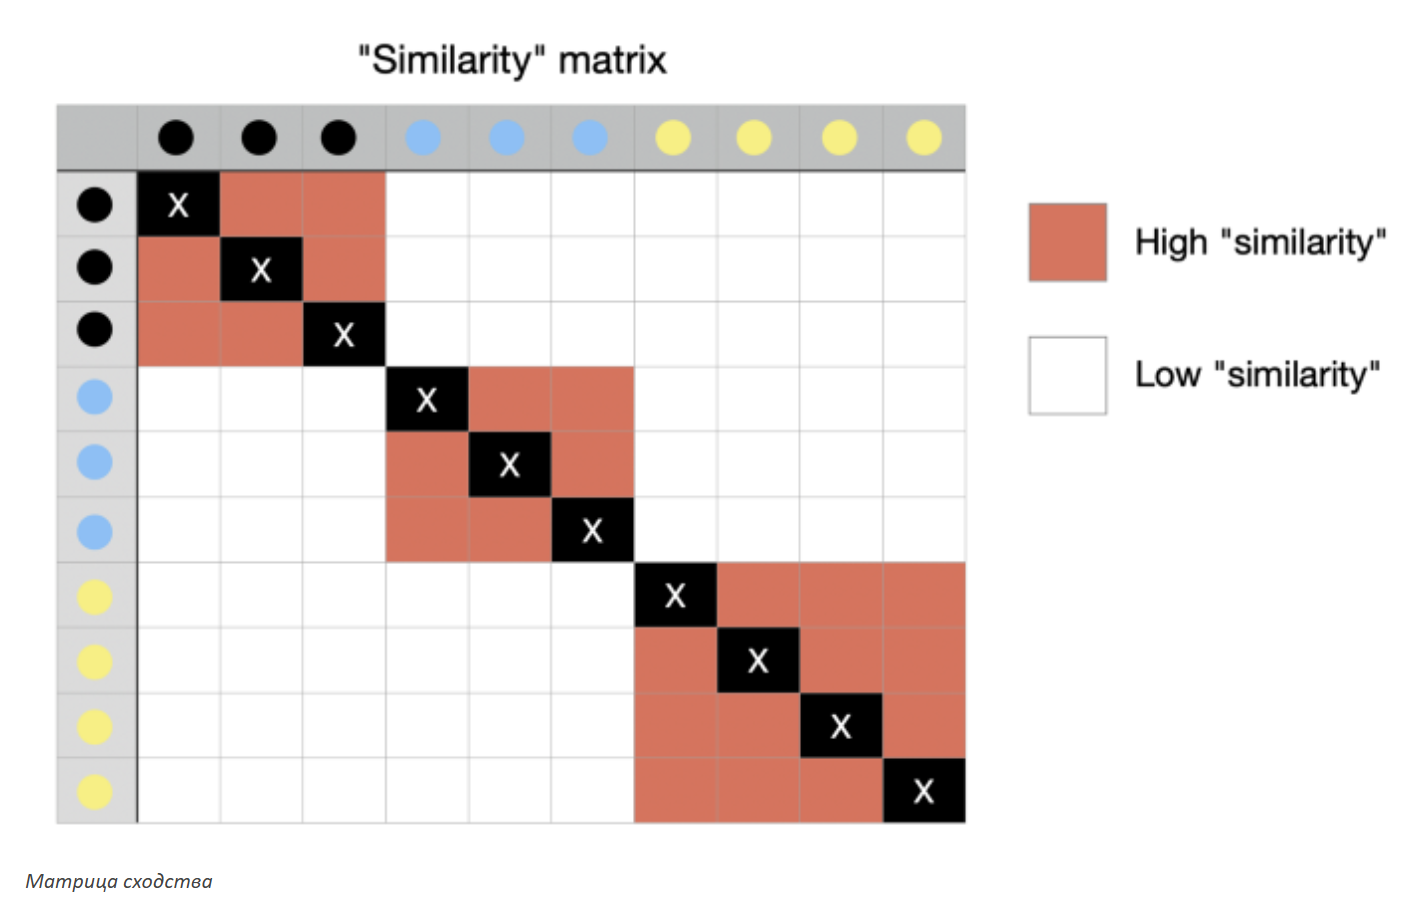

##### Этап 2
Далее переходим к t-SNE, который рандомно отображает все точки в более низкоразмерном пространстве и вычисляет сходство между ними, как описано выше. Правда, с одним отличием: на этот раз алгоритм использует t-распределение вместо нормального распределения.

Неудивительно, что новая матрица сходства значительно отличается от исходной из-за рандомного отображения. Вот пример того, как это может выглядеть.

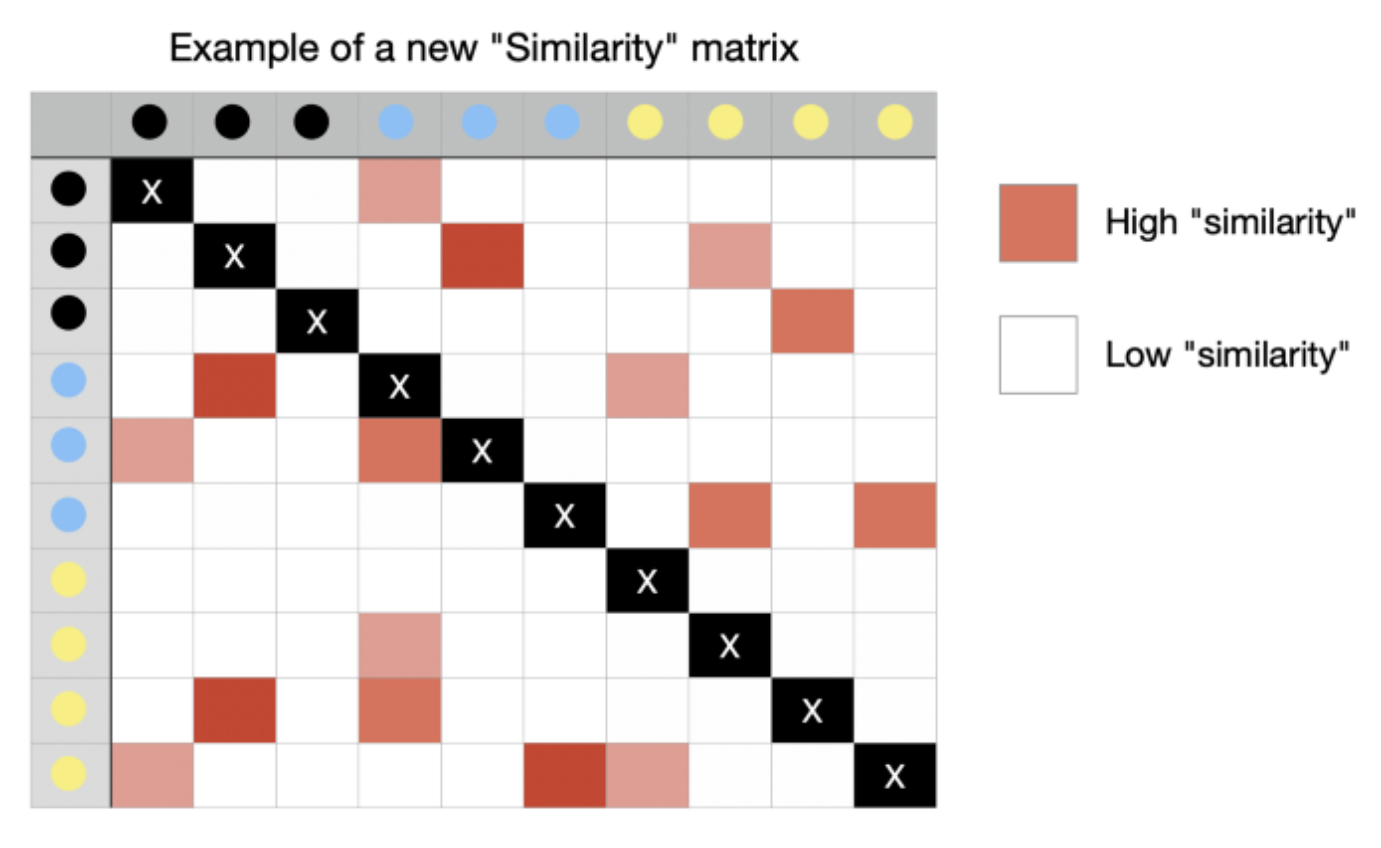

##### Этап 3
Теперь цель алгоритма состоит в том, чтобы создать новую матрицу сходства, похожую на исходную, используя итерационный подход. С каждой итерацией точки перемещаются к своим ближайшим соседям из исходного многомерного пространства и удаляются от отдаленных.

Новая матрица сходства постепенно начинает больше походить на исходную. Процесс продолжается до тех пор, пока не будет достигнуто максимальное количество итераций или предельное улучшение.

Описание этого процесса в сугубо научных терминах выглядит так: алгоритм минимизирует расхождение Кульбака–Лейблера (расхождение KL) посредством градиентного спуска.

##### Перплексия
Перплексия - гиперпараметр, который описывает ожидаемую плотность вокруг каждой точки или, другими словами, устанавливает соотношение целевого количества ближайших соседей к интересующей точке.

Параметр перплексии играет важнейшую роль в определении конечного результата вложения. Как правило, можно выбрать значение перплексии где-то между 5 и 50, но при этом обязательно следует поэкспериментировать с другими значениями.

Низкое значение заставляет алгоритм фокусироваться на меньшем количестве соседей, что приводит ко множеству небольших групп. Напротив, высокое значение перплексии расширяет горизонт соседства, что приводит к уменьшению числа более плотно упакованных групп.

#### Использование в Python

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [22]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (178, 12)
New Shape of X:  (178, 2)
Kullback-Leibler divergence after optimization:  0.10416030138731003
No. of iterations:  999


Кластер 14 содержит 53 точек
Кластер 13 содержит 66 точек
Кластер 15 содержит 2 точек
Кластер 12 содержит 53 точек
Кластер 11 содержит 4 точек


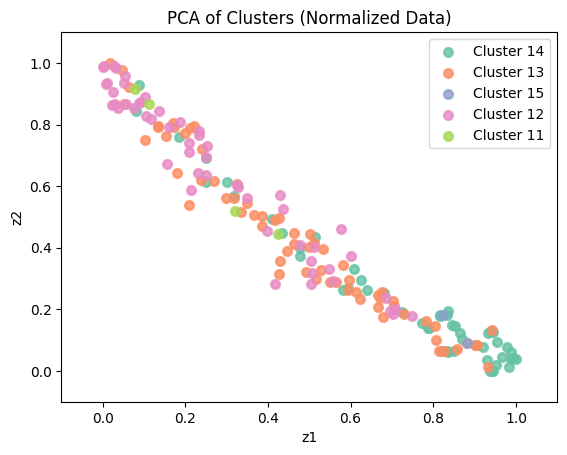

In [23]:
# Нормализация данных
scaler = MinMaxScaler()
X_new_normalized = scaler.fit_transform(X_new)

for color, i in zip(colors, y_unique):
    cluster_points = X_new_normalized[y == i]
    print(f"Кластер {i} содержит {len(cluster_points)} точек")
    if len(cluster_points) > 0:
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1], color=color, alpha=0.8, lw=2, label=f'Cluster {i}'
        )
    else:
        print(f"Предупреждение: кластер {i} пуст!")

# Установим ограничения на оси
plt.xlim(X_new_normalized[:, 0].min() - 0.1, X_new_normalized[:, 0].max() + 0.1)
plt.ylim(X_new_normalized[:, 1].min() - 0.1, X_new_normalized[:, 1].max() + 0.1)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("PCA of Clusters (Normalized Data)")
plt.show()

# Поиск выбросов. DBSCAN

DBSCAN расшифровывается как Density-Based Spatial Clustering of Applications with Noise. Он принадлежит к семейству алгоритмов кластеризации с неконтролируемым обучением.

Когда дело доходит до кластеризации, обычно более популярны алгоритмы K-средних или иерархической кластеризации. Но они хорошо работают только тогда, когда кластеры легко обнаружить. Они не дадут хороших результатов, когда кластеры имеют сложные формы или структуры, и именно здесь алгоритм DBSCAN берет верх.

DBSCAN — это алгоритм кластеризации на основе плотности, который предполагает, что кластеры — это плотные области в пространстве, разделенные областями с более низкой плотностью точек данных. Здесь «плотно сгруппированные» точки данных объединяются в один кластер. Мы можем идентифицировать кластеры в больших наборах данных, наблюдая за локальной плотностью точек данных.

Уникальной особенностью кластеризации DBSCAN является то, что она устойчива к выбросам, благодаря чему находит применение в системах обнаружения аномалий. Кроме того, он не требует ввода количества кластеров, в отличие от K-Means, где нам приходится вручную указывать количество центроидов.

**Ключевые характеристики алгоритма DBSCAN**
1. Не требуется количество кластеров в качестве входных данных.
1. Он может обнаруживать выбросы при нахождении кластеров.
1. Алгоритм DBSCAN может обнаруживать кластеры сложной или случайной формы и размера.


## Терминология

1. Эпсилонная стоимость (eps)
  Эпсилон – это радиус окружности вокруг точки данных, так что все остальные точки данных, попадающие внутрь окружности, считаются точками окрестности. Другими словами, две точки считаются соседями, если расстояние между ними меньше или равно eps.

  Если значение eps крайне мало, то большинство точек могут не лежать в окрестности и будут рассматриваться как выбросы. Это приведет к плохой кластеризации, так как большинство точек не удовлетворяют минимальному «нет». точек, необходимых для создания плотной области.

  С другой стороны, если выбрано чрезвычайно высокое значение, то большинство точек данных останутся в том же кластере. Это снова приведет к неправильной кластеризации, при которой несколько кластеров могут в конечном итоге объединиться из-за высокого значения эпсилона.

  В идеале мы должны выбирать значение eps на основе расстояния до набора данных (используя график k-расстояния), однако обычно предпочтение отдается небольшим значениям eps.

2. Минимальное количество точек
  В DBSCAN minPts - это минимальное количество точек данных, которое должно быть в регионе для определения кластера. Вы можете выбрать значение minPts в зависимости от ваших знаний в предметной области. Но если вам не хватает знаний в предметной области, хорошей точкой отсчета будет иметь minPts ≥ D + 1, где D — размерность набора данных.

  Рекомендуется оставлять значение minPts не менее 3, но для больших наборов данных следует выбирать большее значение minPts, особенно если у него много выбросов.

3.  Типы точек в кластеризации DBSCAN
  Исходя из двух вышеуказанных параметров, точку можно классифицировать как:

  **Core point** Центральная точка — это точка, в которой по крайней мере минимальное количество точек (включая саму точку) в окружающей ее области в радиусе eps.

  **Border point** Пограничная точка – это точка, в которой можно добраться из центральной точки, и в пределах окружающего ее региона насчитывается менее минимального количества точек.

  **Outlier** Выброс не является ключевой точкой и не может быть достигнут из каких-либо основных точек.

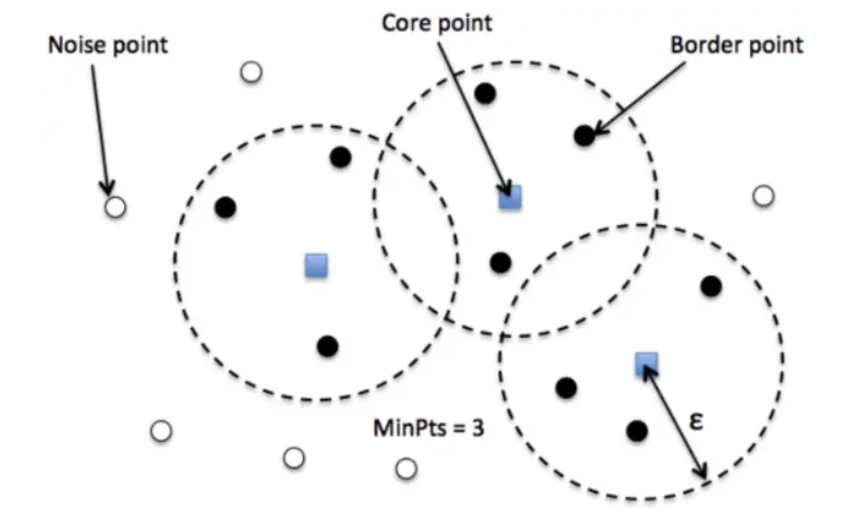

## Алгоритм

Мы начинаем с точек данных и значений эпсилона и minPts в качестве входных данных:

1. Выбираем случайную отправную точку, которая еще не была посещена.
1. Определите окрестности этой точки с помощью эпсилона, который по сути выступает в роли радиуса.
1. сли точки в окрестности удовлетворяют критериям minPts, то точка помечается как точка ядра. Начнется процесс кластеризации, и точка будет помечена как посещенная, в противном случае эта точка будет помечена как шумовая.
1. Все точки в окрестности центральной точки также помечаются как часть кластера, и описанная выше процедура из шага 2 повторяется для всех точек окрестности эпсилон.
Извлекается новая непосещенная точка, и после описанных выше шагов они либо включаются в состав другого кластера, либо помечаются как шум.
1. Вышеуказанный процесс продолжается до тех пор, пока не будут посещены все точки.

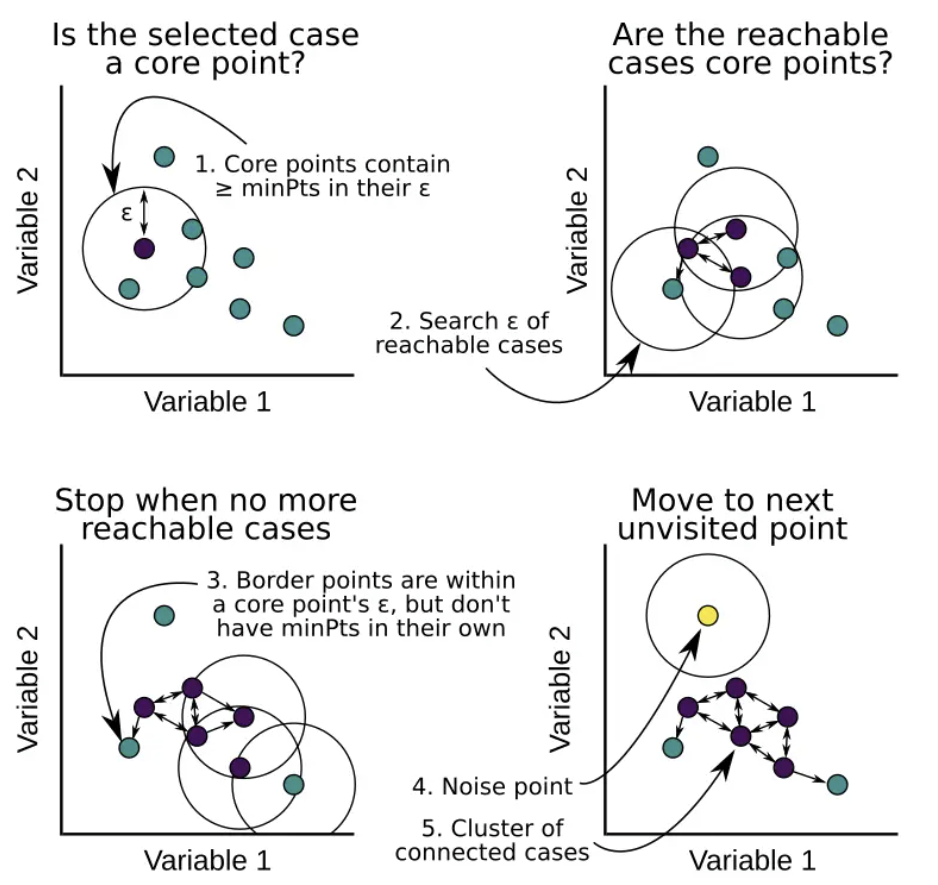

## DBSCAN для кластеризации

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [25]:
dbscan_cluster1 = DBSCAN(eps = 0.28, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [26]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 0
Estimated no. of noise points: 178
v_measure = 0.0


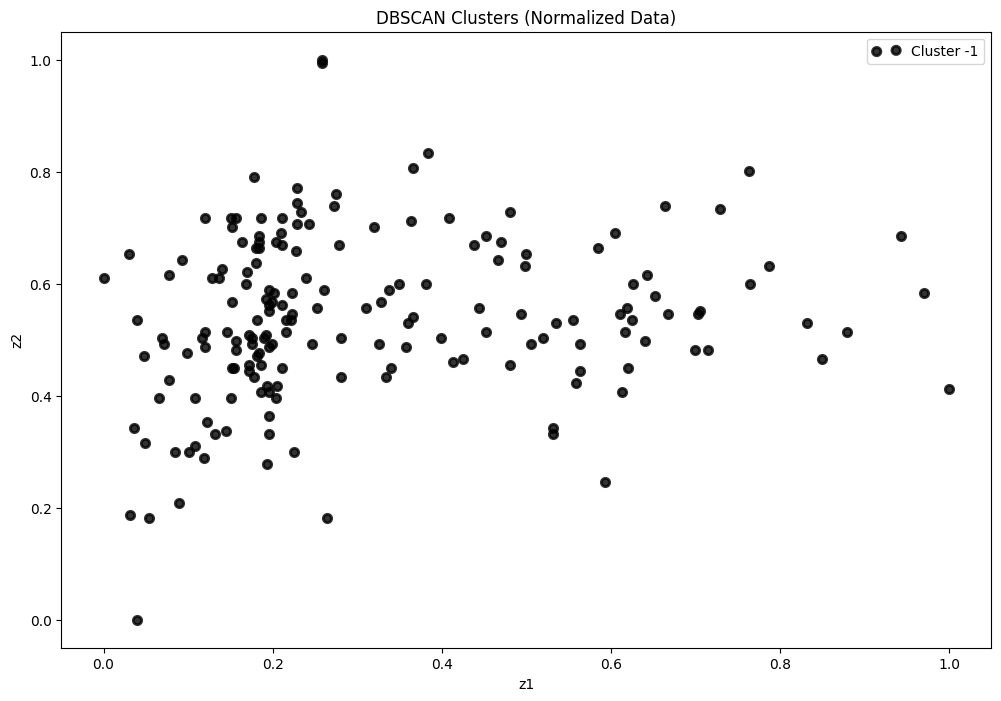

In [195]:
# Нормализация данных
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X[cols_for_clusters])  # Нормализуем только выбранные столбцы

# Создаем фигуру для отображения
plt.figure(figsize=(12, 8))

# Получаем уникальные метки кластеров
unique_labels = np.unique(dbscan_cluster1.labels_)

# Цвета для кластеров
colors = ["navy", "turquoise", "darkorange", "red", "green", "blue", "purple"]

lw = 2

# Отображаем кластеры
for color, label in zip(colors, unique_labels):
    if label == -1:  # Для шума
        color = 'k'  # Используем черный цвет для шума
    cluster_points = X_normalized[dbscan_cluster1.labels_ == label]

    # Если кластер не пустой, отобразим его
    if len(cluster_points) > 0:
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1], color=color, alpha=0.8, lw=lw, label=f'Cluster {label}'
        )
    else:
        print(f"Cluster {label} is empty!")  # Если кластер пустой

# Настройка графика
plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("DBSCAN Clusters (Normalized Data)")
plt.show()

In [27]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [28]:
import sklearn
#возможные метрики расстояния
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

Чтобы правильно опрделить число eps, воспользуемся правилом локтя.

Для этого выведем график изменения средних расстояний от каждой точки до min_samples ближайших.

Подробнее о NearestNeighbors можно почитать тут:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors

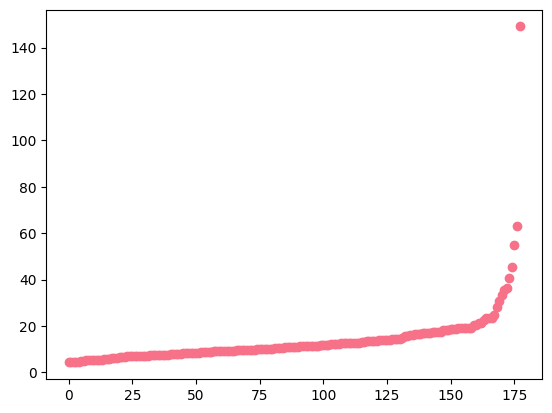

In [29]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

eps  выбирают в точке изгиба графика

## DBSCAN для определения выбросов

In [30]:
dbscan = DBSCAN(eps = 18, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=18, min_samples=3)


In [31]:
pred = dbscan.fit_predict(X)

In [32]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 8
Estimated no. of noise points: 36
v_measure = 0.15346254981949484


In [33]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

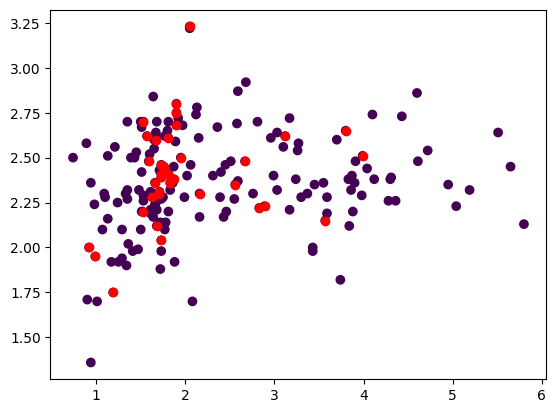

In [34]:
plt.scatter( X[cols_for_clusters[0]], X[cols_for_clusters[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols_for_clusters[0]], values[cols_for_clusters[1]], color='r')
plt.show()

# Задание

1. Изучить теорию
1. Реализовать рассмотренные методы на своем датасете (признаков должно быть более 5)
1. Визуализировать результаты